In [1]:
# Goal: predict the growth or decline of healthcare infrastructure.
# Load the transformed dataset of WHO Infrastructure data from 2010 to 2014 into a Pandas DataFrame.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler

#import regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [2]:
# load the first data set

df = pd.read_csv("dataset/cleaned_WHO_Infrastructure.csv")
df.head()

,Country,Health posts,Health centers,Rural/District hospitals,Provincial hospitals,Specialized Hospitals,Hospitals,Year,Total_hf_densities,Region,GDP,Population,Health Expenditure,GDP Per Capita,Population Density
0,Afghanistan,2.950000,1.220000,0.180000,0.10,0.09,0.370000,2013,4.910000,Asia,2.056449e+10,31541209.0,1.810901e+09,651.987862,48.312363
1,Afghanistan,2.870000,1.190000,0.180000,0.10,0.08,2.235401,2010,6.655401,Asia,1.563384e+10,28189672.0,1.339769e+09,554.594735,43.178740
2,Albania,13.080000,7.032648,0.720000,0.35,0.28,1.360000,2013,22.822648,Europe,1.277622e+10,2895092.0,8.013688e+08,4413.063397,100.698852
3,Albania,12.950000,7.032648,0.720000,0.34,0.28,2.235401,2010,23.558050,Europe,1.192693e+10,2913021.0,7.441204e+08,4094.349699,101.322470
4,Angola,22.120991,7.032648,1.188238,0.00,0.00,2.235401,2010,32.577279,Africa,8.169953e+10,23364185.0,2.201884e+09,3496.784796,18.740824


In [3]:
df.isnull().sum()

Country                     0
Health posts                0
Health centers              0
Rural/District hospitals    0
Provincial hospitals        0
Specialized Hospitals       0
Hospitals                   0
Year                        0
Total_hf_densities          0
Region                      0
GDP                         0
Population                  0
Health Expenditure          0
GDP Per Capita              0
Population Density          0
dtype: int64

In [4]:
df.dtypes

Country                      object
Health posts                float64
Health centers              float64
Rural/District hospitals    float64
Provincial hospitals        float64
Specialized Hospitals       float64
Hospitals                   float64
Year                          int64
Total_hf_densities          float64
Region                       object
GDP                         float64
Population                  float64
Health Expenditure          float64
GDP Per Capita              float64
Population Density          float64
dtype: object

In [5]:
# Create a mapping dictionary
year_mapping = {2010: 0, 2013: 1, 2014: 2}

# Apply the mapping to the 'Year' column
df['Year'] = df['Year'].map(year_mapping)
df.head()

,Country,Health posts,Health centers,Rural/District hospitals,Provincial hospitals,Specialized Hospitals,Hospitals,Year,Total_hf_densities,Region,GDP,Population,Health Expenditure,GDP Per Capita,Population Density
0,Afghanistan,2.950000,1.220000,0.180000,0.10,0.09,0.370000,1,4.910000,Asia,2.056449e+10,31541209.0,1.810901e+09,651.987862,48.312363
1,Afghanistan,2.870000,1.190000,0.180000,0.10,0.08,2.235401,0,6.655401,Asia,1.563384e+10,28189672.0,1.339769e+09,554.594735,43.178740
2,Albania,13.080000,7.032648,0.720000,0.35,0.28,1.360000,1,22.822648,Europe,1.277622e+10,2895092.0,8.013688e+08,4413.063397,100.698852
3,Albania,12.950000,7.032648,0.720000,0.34,0.28,2.235401,0,23.558050,Europe,1.192693e+10,2913021.0,7.441204e+08,4094.349699,101.322470
4,Angola,22.120991,7.032648,1.188238,0.00,0.00,2.235401,0,32.577279,Africa,8.169953e+10,23364185.0,2.201884e+09,3496.784796,18.740824


In [6]:
categorical_col = df.select_dtypes(include=["object"]).columns.tolist()

label_encoder = LabelEncoder()
for column in categorical_col:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,Country,Health posts,Health centers,Rural/District hospitals,Provincial hospitals,Specialized Hospitals,Hospitals,Year,Total_hf_densities,Region,GDP,Population,Health Expenditure,GDP Per Capita,Population Density
0,0,2.950000,1.220000,0.180000,0.10,0.09,0.370000,1,4.910000,1,2.056449e+10,31541209.0,1.810901e+09,651.987862,48.312363
1,0,2.870000,1.190000,0.180000,0.10,0.08,2.235401,0,6.655401,1,1.563384e+10,28189672.0,1.339769e+09,554.594735,43.178740
2,1,13.080000,7.032648,0.720000,0.35,0.28,1.360000,1,22.822648,2,1.277622e+10,2895092.0,8.013688e+08,4413.063397,100.698852
3,1,12.950000,7.032648,0.720000,0.34,0.28,2.235401,0,23.558050,2,1.192693e+10,2913021.0,7.441204e+08,4094.349699,101.322470
4,2,22.120991,7.032648,1.188238,0.00,0.00,2.235401,0,32.577279,0,8.169953e+10,23364185.0,2.201884e+09,3496.784796,18.740824


In [32]:
"""Here, the data is split into features and target"""
X = df.drop(["Total_hf_densities"], axis=1)
Y = df["Total_hf_densities"]

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (179, 14)
Y_train shape: (179,)
X_test shape: (78, 14)
Y_test shape: (78,)


In [34]:
print(len(X_train) + len(X_test) == len(X))
print(len(Y_train) + len(Y_test) == len(Y))

True
True


In [35]:
# Standardise features in X
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
"""Model Training: 5 regression models will be fitted to the training data for comparison."""

# instantiate models using default parameters
modelclasses = {'LinearR': LinearRegression(), 
                'SVR': SVR(), 
                'LassoR': Lasso(), 
                'RidgeR': Ridge(),
                'RandomForest': RandomForestRegressor()
                }

In [37]:
# Iteration of models

# create a list to store model results
mae_scores = []
rmse_scores = []
r2_scores = []

for model_name, model_method in modelclasses.items():
       
    # fit model to training data
    model_method.fit(X_train, Y_train)
    
    # predict the outcomes on the test set
    y_pred = model_method.predict(X_test)
    
    # append Mean Absolute Error evaluation metric for the model to the list
    mae_scores.append(metrics.mean_absolute_error(Y_test, y_pred))
    
    # append RMSE evaluation metric for the model to the list 
    rmse_scores.append(np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
    
    # append R2 score evaluation metric for the model to the list
    r2_scores.append(metrics.r2_score(Y_test, y_pred))
    
# create a dataframe to store the results
reg_results = pd.DataFrame({"Model":modelclasses.keys(), "MAE Score": mae_scores, "RMSE Score": rmse_scores, "R2 Score": r2_scores})

# round results to 4 decimal places
reg_results = reg_results.round(4)
reg_results

,Model,MAE Score,RMSE Score,R2 Score
0,LinearR,0.0000,0.0000,1.0000
1,SVR,21.3414,45.4397,0.0732
2,LassoR,3.5036,17.4394,0.8635
3,RidgeR,0.3348,1.5728,0.9989
4,RandomForest,8.0325,28.5592,0.6339


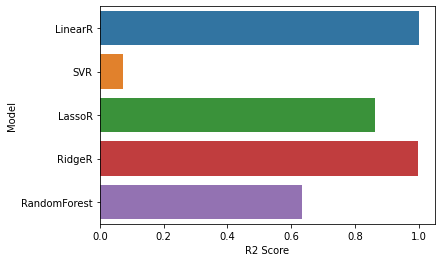

In [38]:
# plot the R2 Score 
sns.barplot(x=reg_results['R2 Score'], y=reg_results.Model);

In [39]:
# Model Check 2
# Due to high cardinality of the country feature i.e. 125 unique features, it will be dropped
# The Total_hf_densities represents the sum of hospital densities and health centre densities

In [40]:
"""Here, the data is split into features and target"""

feature_columns = ['Year', 'Region', 'GDP', 'Population', 'Health Expenditure', 'GDP Per Capita', 'Population Density']
X = df[feature_columns]
Y = df['Total_hf_densities']

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (179, 7)
Y_train shape: (179,)
X_test shape: (78, 7)
Y_test shape: (78,)


In [42]:
print(len(X_train) + len(X_test) == len(X))
print(len(Y_train) + len(Y_test) == len(Y))

True
True


In [43]:
# Standardize features in X
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
"""Model Training: 5 regression models will be fitted to the training data for comparison."""

# instantiate models using default parameters
modelclasses = {'LinearR': LinearRegression(), 
                'SVR': SVR(), 
                'LassoR': Lasso(), 
                'RidgeR': Ridge(),
                'RandomForest': RandomForestRegressor()
                }

In [45]:
# Iteration of models

# create a list to store model results
mae_scores = []
rmse_scores = []
r2_scores = []

for model_name, model_method in modelclasses.items():
       
    # fit model to training data
    model_method.fit(X_train, Y_train)
    
    # predict the outcomes on the test set
    y_pred = model_method.predict(X_test)
    
    # append Mean Absolute Error evaluation metric for the model to the list
    mae_scores.append(metrics.mean_absolute_error(Y_test, y_pred))
    
    # append RMSE evaluation metric for the model to the list 
    rmse_scores.append(np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
    
    # append R2 score evaluation metric for the model to the list
    r2_scores.append(metrics.r2_score(Y_test, y_pred))
    
# create a dataframe to store the results
reg_results = pd.DataFrame({"Model":modelclasses.keys(), "MAE Score": mae_scores, "RMSE Score": rmse_scores, "R2 Score": r2_scores})

# round results to 4 decimal places
reg_results = reg_results.round(4)
reg_results

,Model,MAE Score,RMSE Score,R2 Score
0,LinearR,23.9794,46.1494,0.0440
1,SVR,23.9037,48.0434,-0.0361
2,LassoR,24.7955,46.4308,0.0323
3,RidgeR,24.2745,46.2685,0.0390
4,RandomForest,26.3094,53.3980,-0.2799


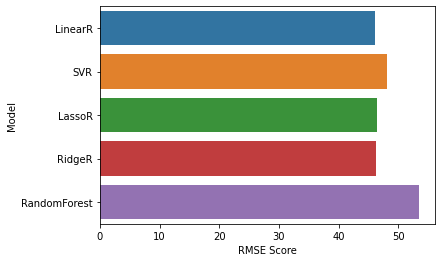

In [48]:
# plot the RMSE scores in the 'rmse_scores' list 
sns.barplot(x=reg_results['RMSE Score'], y=reg_results.Model);
